In [ ]:
# CNN

## LOCAL RELATIONSHIP : 인근 픽셀들끼리 관계가 더 깊다

#COVOULUTION LAYER : 필터를 통해서 부분부분 자른다
#ACTIVATION LAYER  : 비선형을 위해 사용 일반적으로 RELU
#POOLING LAYER : 나온 LAYER를 샘플링한다, RESIZE 효과, SUB-SAMPLING, OVERFITTING을 방지하기 위함, 압축

#FULLY CONNECTED LAYER : INPUT값집어넣어서 OUT값 내는

In [ ]:
# FILTER의 DEPTH(RGB 컬러)는 처음 인풋과 맞춰야한다

# 필터사이즈만큼 element wise 방식으로 곱해서 모두 더함 -> 필터가 지나간 자리에 하나의 y값만 남음
# ex) 5*5*3 필터를 쓸때 같은 인덱스끼리 다 곱하고 다 더한게 y 값이됨 x는 내가본 이미지, w는 필터,b는 로직에 노영향
# 한칸씩 움직일때 stride를 1씩줬다고한다

# pad를 하면 stride로 나눠지지 않는부분을 0으로 채워서 이미지가 유지가되고, 가장자리 info를 줄 수 있다

#필터는 랜덤초기화이기 때문에 각각 다르다
# 필터의 갯수(depth)가 출력값의 depth가 된다 , depth는 그냥 depth ㅎㅎ


In [ ]:
# pooling, 중요한 정보만 뽑아내고 나머지 머리자

# max pooling 필터가 본것중에 가장 큰것만 뽑아낸다
# average, min 등 여러가지가 있지만 일반적으로 max pooling을 마니씀

#후반부에는 추상화 부분만 남는다


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(1, 3, 3, 1)


C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


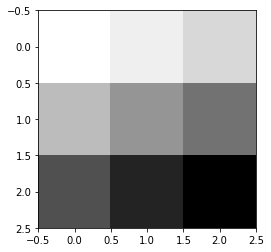

In [7]:
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)

sess = tf.InteractiveSession()
print(image.shape) #이미지의 shape (이미지개수 * 가로 * 세로 * 높이)
plt.imshow(image.reshape(3,3), cmap='Greys')

Filter shape : (2, 2, 1, 1)
(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


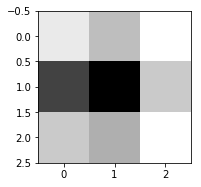

In [14]:
#tf 에선 이미지와 필터 위치가 바뀐다

weight = tf.constant([[[[1.]],[[1.]]],
                     [[[1.]],[[1.]]]]) 

#filter shape (가로 *세로 *높이 *갯수(depth))

print('Filter shape :',weight.shape)
# conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='VALID') #strides 순서는[위,오른,밑,왼]
conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME') #원래 인풋사이즈랑 똑같은 사이즈
#PADDING 맞추는 순서는 가로는 오른쪽 부터, 세로는 아래부터해서 나머지 왼쪽, 위쪽으로 맞춰간다

conv2d_img = conv2d.eval()
print(conv2d_img.shape)
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i , one_img in enumerate(conv2d_img):
    # enumerate하면 키, value 가 나온다!!!
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1)
    plt.imshow(one_img.reshape(3,3), cmap = "Greys")

(2, 2, 1, 3)
(1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


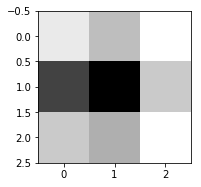

In [17]:
weight2 = tf.constant([[[[1.,10.,-1.]],[[1.,10.,-1.]]],
                     [[[1.,10.,-1.]],[[1.,10.,-1.]]]])
print(weight2.shape)

print(conv2d_img.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME') 
conv2d_img = conv2d.eval()
conv2d_img = np.swapaxes(conv2d_img,0,3)
for i , one_img in enumerate(conv2d_img):
    # enumerate하면 키, value 가 나온다!!!
    print(one_img.reshape(3,3))
    plt.subplot(1,2,i+1)
    plt.imshow(one_img.reshape(3,3), cmap = "Greys")

In [22]:
image = np.array([
    [
        [
            [4],[3]],
                   [[2],[1]]]], dtype=np.float32)

pool = tf.nn.max_pool(image, ksize=[1,2,2,1] , strides = [1,1,1,1], padding='VALID') 
#ksize(필터사이즈) =위,오른,아래,왼 
print(pool.shape)
print(pool.eval()) # 하나의 값은 4

(1, 1, 1, 1)
[[[[4.]]]]


In [23]:
# mnist 에 적용하기

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
x_train = mnist.train.images
y_label = mnist.train.labels

In [4]:
learning_rate = 0.001
training_epoch= 15
batch_size =100
keep_prob = tf.placeholder(tf.float32)

X= tf.placeholder(tf.float32, shape=[None, 784])
Y= tf.placeholder(tf.float32, shape=[None, 10])

X_img = tf.reshape(X, [-1, 28,28,1])
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01)) 
#stddeviation 표준화에서 1시그마 값을 0.01로 작게줌으로서 랜덤값을 줄이기
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
#L1 SHAPE 은 -1(N개),*28*28*32
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides= [1,2,2,1], padding='SAME')
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
#사이즈를 줄이는게 STIDE를 2로주면서 PADDING을 SAME으로 주면됌
# L1 = -1*14*14*32

W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides= [1,2,2,1], padding='SAME')
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
# L2 = -1*7*7*64

W3 = tf.Variable(tf.random_normal([3,3,64,128], stddev=0.01))
L3 = tf.nn.conv2d(L2, W3, strides=[1,1,1,1], padding='SAME')
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1,2,2,1], strides= [1,2,2,1], padding='SAME')
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
# l3 = -1, 4,4,128


L3_float = tf.reshape(L3, [-1, 4*4*128])
W4 = tf.get_variable('W4', shape=[4*4*128,625],initializer=tf.contrib.layers.xavier_initializer())
B4 = tf.Variable(tf.random_normal([625]))
dnn_1d = tf.nn.relu(tf.matmul(L3_float,W4)+B4)
dnn_1d = tf.nn.dropout(dnn_1d, keep_prob=keep_prob)

W5 =tf.get_variable('W5', shape=[625,256],initializer=tf.contrib.layers.xavier_initializer())
B5 = tf.Variable(tf.random_normal([256]))
dnn_2d = tf.nn.relu(tf.matmul(dnn_1d, W5)+B5)
dnn_2d = tf.nn.dropout(dnn_2d, keep_prob=keep_prob)

W6 = tf.get_variable('W6', shape=[256,10],initializer=tf.contrib.layers.xavier_initializer())
B6 = tf.Variable(tf.random_normal([10]))
logits = tf.matmul(dnn_2d, W6)+B6
hypothesis = tf.nn.softmax(logits)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [5]:
training_epoch = 15
batch_size = 100


sess = tf.Session()
sess.run(tf.global_variables_initializer())

for epoch in range(training_epoch):
    avg_cost=0
    total_batch = int(mnist.train.num_examples/batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c,_ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y:batch_ys, keep_prob:0.5})
        avg_cost += c/total_batch
    print("Epoch :", epoch , "avg_cost : ",avg_cost)


Epoch : 0 avg_cost :  0.7180851937830449
Epoch : 1 avg_cost :  0.20303943041034728
Epoch : 2 avg_cost :  0.15624224268238643
Epoch : 3 avg_cost :  0.12968699230050496
Epoch : 4 avg_cost :  0.11616179308600047
Epoch : 5 avg_cost :  0.10836662400852544
Epoch : 6 avg_cost :  0.09981754999607803
Epoch : 7 avg_cost :  0.09712277342480696
Epoch : 8 avg_cost :  0.09035509632053709
Epoch : 9 avg_cost :  0.0880414338663898
Epoch : 10 avg_cost :  0.08505872342566197
Epoch : 11 avg_cost :  0.08266147791408004
Epoch : 12 avg_cost :  0.08159494435076013
Epoch : 13 avg_cost :  0.0787626020500267
Epoch : 14 avg_cost :  0.07675500220619144
